In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_be84d4cb95324c9b8a5029133a72eb69 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KJoaDApzM9O6RQrKZmuTv5NyHQSEiDQNzOuND887kTU_',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_be84d4cb95324c9b8a5029133a72eb69.get_object(Bucket='universitypredictor-donotdelete-pr-ycffcf4bnhhzma',Key='Admission_Predict.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.drop(["Serial No."],axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [8]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


# Data Visualization

<AxesSubplot:>

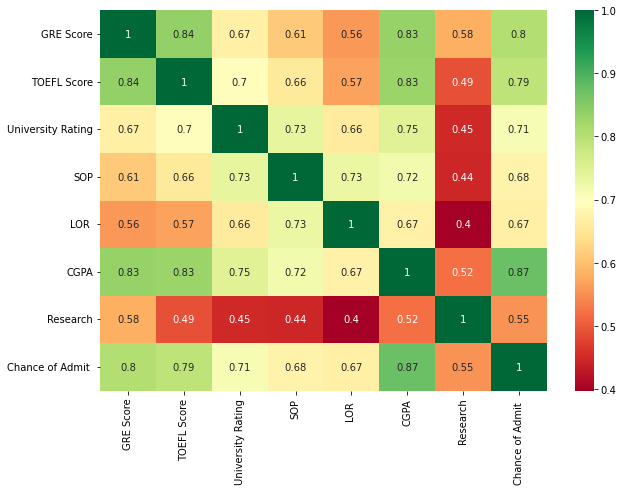

In [10]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

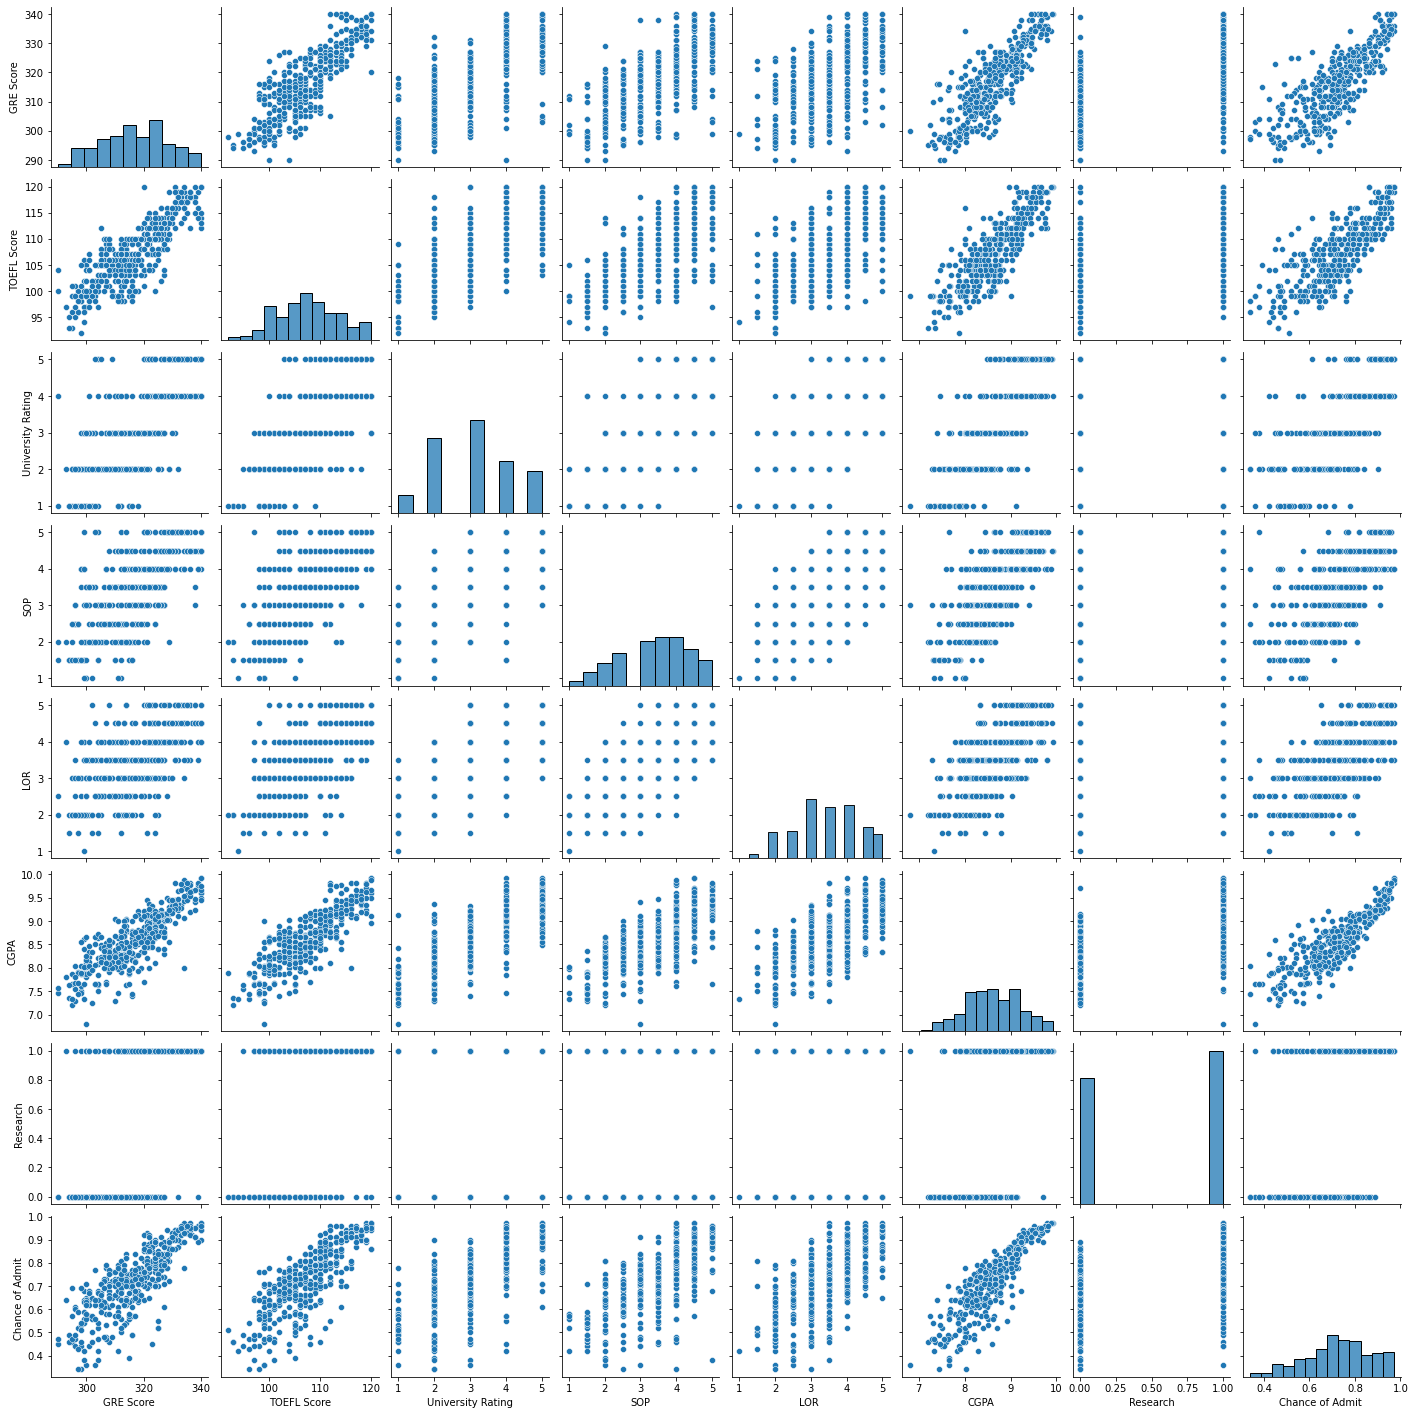

In [11]:
sns.pairplot(data)

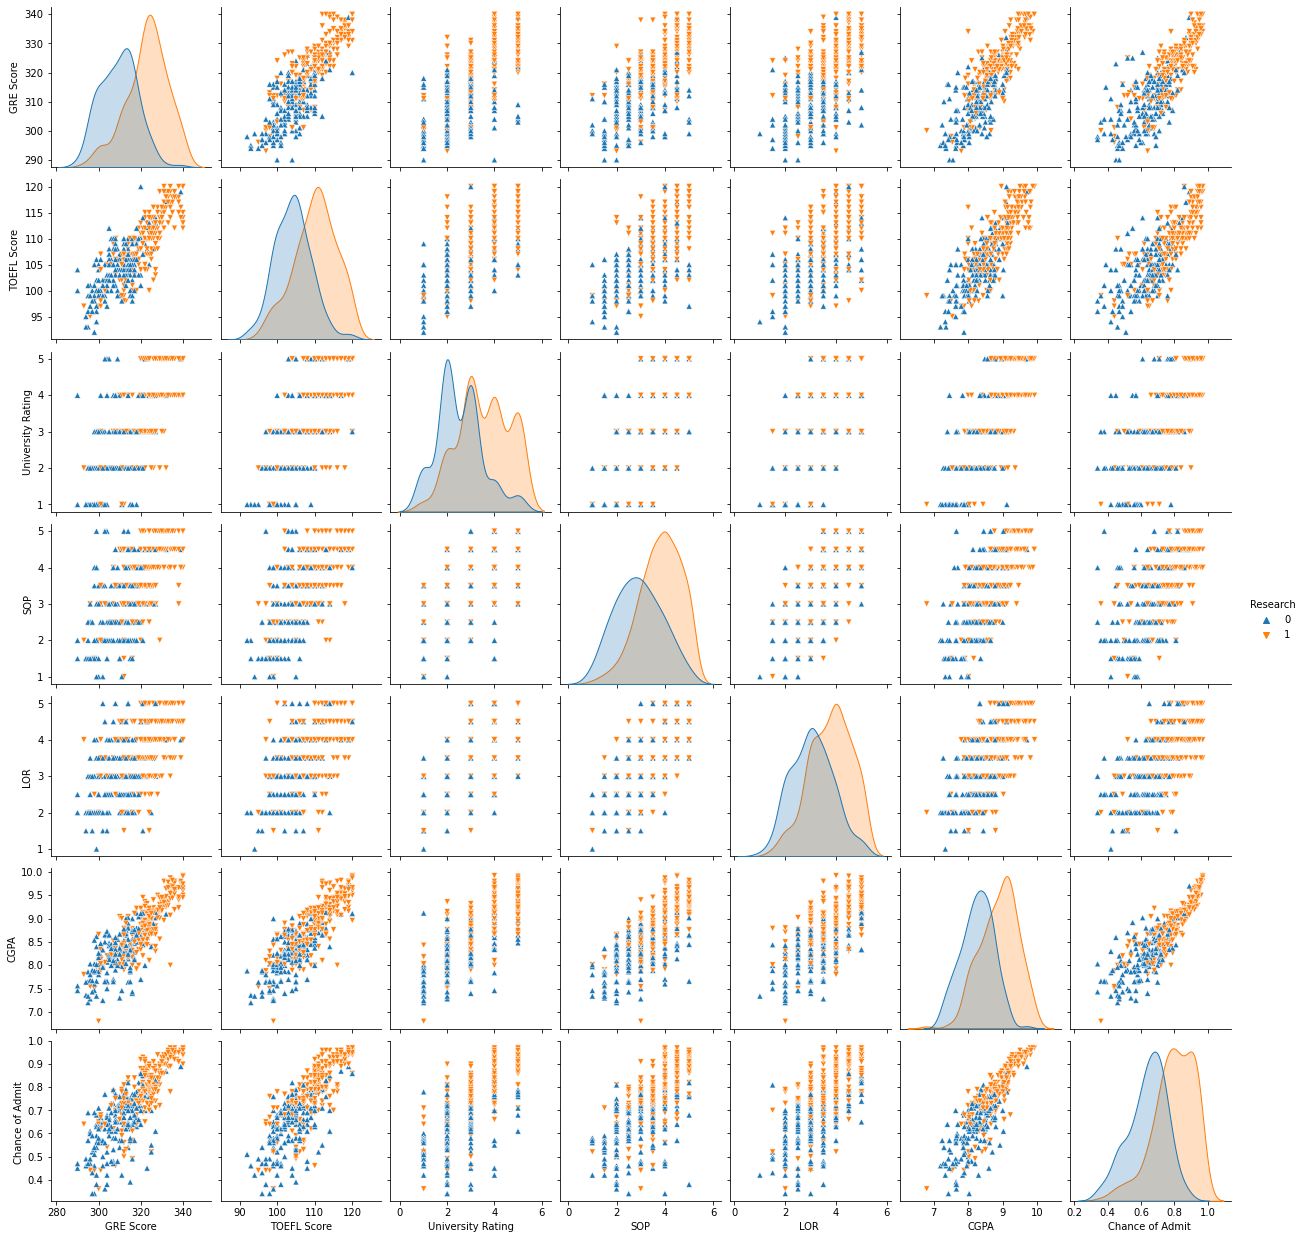

In [12]:
sns.pairplot(data=data,hue='Research',markers=["^", "v"])

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

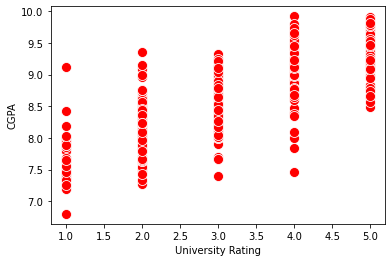

In [13]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red', s=100)

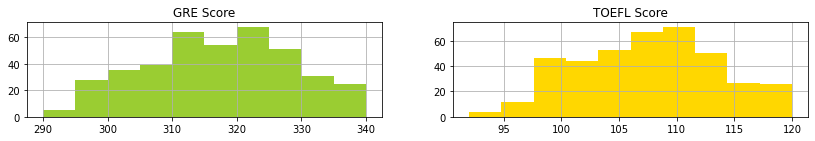

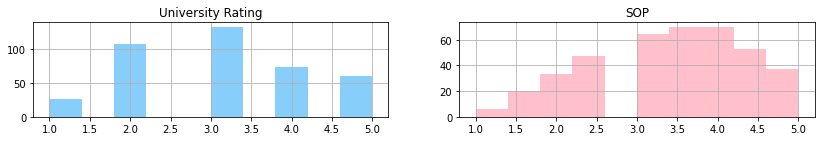

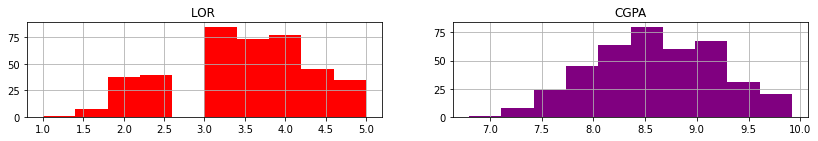

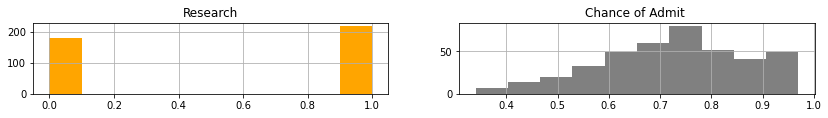

In [14]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    fig = plt.figure(figsize=(14,8))
    plt.subplot2grid((4,2),(i,0))
    data[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [15]:
print('Mean CGPA Score is :',int(data['CGPA'].mean()))
print('Mean GRE Score is :',int(data['GRE Score'].mean()))
print('Mean TOEFL Score is :',int(data['TOEFL Score'].mean()))
print('Mean University rating is :',int(data['University Rating'].mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107
Mean University rating is : 3


GRE Score
312    19
324    19
314    14
316    14
322    14
Name: GRE Score, dtype: int64


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (49).

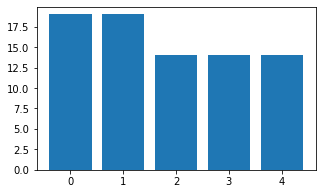

In [16]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']
for i,col in enumerate(category):
    v=data[col].unique()
    g = data.groupby(by=col)[col].count().sort_values(ascending=False)
    r=range(min(len(v),5))
    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r,g.head())
    plt.xticks(r, g.index)
    plt.show()

In [17]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
x=data.iloc[:,0:7].values


In [19]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [20]:
y=data.iloc[:,7:].values

In [21]:
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [22]:
x.shape

(400, 7)

In [23]:
y.shape

(400, 1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                             random_state=10)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320, 1)
(80, 1)


In [26]:
x_train 

array([[323.  , 107.  ,   3.  , ...,   3.5 ,   8.55,   1.  ],
       [313.  , 101.  ,   3.  , ...,   3.  ,   8.04,   0.  ],
       [311.  , 106.  ,   2.  , ...,   3.  ,   8.26,   1.  ],
       ...,
       [314.  , 105.  ,   3.  , ...,   2.5 ,   8.3 ,   0.  ],
       [300.  , 100.  ,   3.  , ...,   3.  ,   8.66,   1.  ],
       [313.  , 102.  ,   3.  , ...,   2.5 ,   8.68,   0.  ]])

In [27]:
x_test 

array([[308.  , 106.  ,   3.  ,   3.5 ,   2.5 ,   8.21,   1.  ],
       [321.  , 109.  ,   4.  ,   4.  ,   4.  ,   8.68,   1.  ],
       [303.  , 100.  ,   2.  ,   3.  ,   3.5 ,   8.06,   1.  ],
       [295.  ,  99.  ,   2.  ,   2.5 ,   3.  ,   7.65,   0.  ],
       [316.  , 102.  ,   3.  ,   2.  ,   3.  ,   7.4 ,   0.  ],
       [311.  ,  99.  ,   1.  ,   2.5 ,   3.  ,   8.43,   1.  ],
       [340.  , 120.  ,   4.  ,   5.  ,   5.  ,   9.5 ,   1.  ],
       [331.  , 117.  ,   4.  ,   4.5 ,   5.  ,   9.42,   1.  ],
       [331.  , 115.  ,   5.  ,   4.  ,   3.5 ,   9.44,   1.  ],
       [305.  , 108.  ,   5.  ,   3.  ,   3.  ,   8.48,   0.  ],
       [327.  , 104.  ,   5.  ,   3.  ,   3.5 ,   8.84,   1.  ],
       [322.  , 110.  ,   4.  ,   4.  ,   5.  ,   9.13,   1.  ],
       [321.  , 109.  ,   3.  ,   3.  ,   3.  ,   8.54,   1.  ],
       [315.  , 100.  ,   1.  ,   2.  ,   2.5 ,   7.95,   0.  ],
       [336.  , 119.  ,   5.  ,   4.  ,   3.5 ,   9.8 ,   1.  ],
       [329.  , 113.  ,  

In [28]:
y_train=(y_train>0.5)

In [29]:
y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [30]:
y_test=(y_test>0.5)

In [31]:
y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [33]:
x_train

array([[ 0.58772699, -0.02912599, -0.05571052, ...,  0.07907984,
        -0.0587481 ,  0.91601335],
       [-0.28378662, -1.02773134, -0.05571052, ..., -0.47104076,
        -0.90721616, -1.09168714],
       [-0.45808934, -0.19556022, -0.94707888, ..., -0.47104076,
        -0.54121033,  0.91601335],
       ...,
       [-0.19663526, -0.36199444, -0.05571052, ..., -1.02116135,
        -0.47466382, -1.09168714],
       [-1.4167543 , -1.19416557, -0.05571052, ..., -0.47104076,
         0.12425482,  0.91601335],
       [-0.28378662, -0.86129712, -0.05571052, ..., -1.02116135,
         0.15752808, -1.09168714]])

In [34]:
x_test

array([[-9.89501085e-01, -3.80084285e-01, -1.54262545e-01,
        -5.82905956e-02, -1.24612074e+00, -7.78192433e-01,
         8.81917104e-01],
       [ 1.78581921e-01,  1.05129696e-01,  6.68471029e-01,
         4.59848032e-01,  5.34051746e-01,  4.67310370e-02,
         8.81917104e-01],
       [-1.43876378e+00, -1.35051225e+00, -9.76996119e-01,
        -5.76429223e-01, -5.93390829e-02, -1.04146588e+00,
         8.81917104e-01],
       [-2.15758409e+00, -1.51225024e+00, -9.76996119e-01,
        -1.09456785e+00, -6.52729912e-01, -1.76107997e+00,
        -1.13389342e+00],
       [-2.70680773e-01, -1.02703626e+00, -1.54262545e-01,
        -1.61270648e+00, -6.52729912e-01, -2.19986905e+00,
        -1.13389342e+00],
       [-7.19943468e-01, -1.51225024e+00, -1.79972969e+00,
        -1.09456785e+00, -6.52729912e-01, -3.92058043e-01,
         8.81917104e-01],
       [ 1.88578016e+00,  1.88424763e+00,  6.68471029e-01,
         1.49612529e+00,  1.72083340e+00,  1.48595922e+00,
         8.8191710

In [35]:

import importlib.util
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [36]:
cls=LogisticRegression(random_state=0)

In [37]:
lr=cls.fit(x_train,y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
y_pred = lr.predict(x_test)


In [39]:
y_pred

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False])

In [40]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [41]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred)*100))


Accuracy score: 95.000000


In [42]:
print("Recall score: %f" %(recall_score(y_test,y_pred)*100))

Recall score: 97.333333


In [43]:
print("ROC score : %f\n" %(roc_auc_score(y_test,y_pred)*100))

ROC score : 78.666667



In [44]:
print(confusion_matrix(y_test,y_pred))

[[ 3  2]
 [ 2 73]]


In [45]:
import pickle
pickle.dump(lr,open('university.pkl','wb'))

In [46]:
!pip install ibm_watson_machine_learning

In [47]:
from ibm_watson_machine_learning import APIClient

In [48]:
wml_credntials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"bkX9c9YmJOMU5-xLWG5byUeIpQ_iQKu5eqBbq9Ib_7lK"
}

In [49]:
client = APIClient(wml_credntials)

In [50]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [51]:
space_uid = guid_from_space_name(client, 'admission')
print("Space_UID = " + space_uid)

Space_UID = d4b2f376-f3cd-477c-888f-c6ee78f9605d


In [52]:
client.set.default_space(space_uid)

'SUCCESS'

In [53]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [54]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [55]:
model_details=client.repository.store_model(model=lr,meta_props={
    client.repository.ModelMetaNames.NAME:"admission_prediction",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})

model_id=client.repository.get_model_id(model_details)

In [56]:
model_id

'1d1881a1-5478-4b6b-9904-9bd2b7e20e98'